Q1. What is the mathematical formula for a linear SVM?

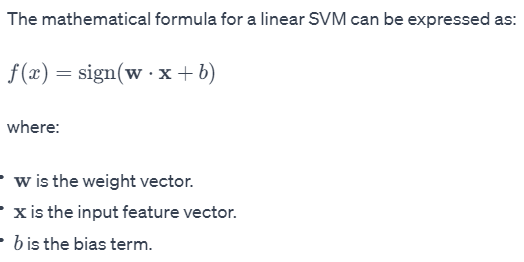

Q2. What is the objective function of a linear SVM?

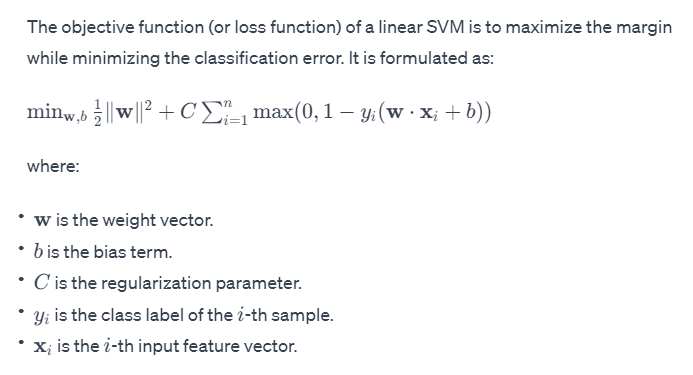

Q3. What is the kernel trick in SVM?

The kernel trick is a technique used in Support Vector Machines (SVMs) to transform the input features into a higher-dimensional space without explicitly calculating the new representation. The idea is to use a kernel function to compute the dot product between the transformed feature vectors efficiently. This allows SVMs to work well in cases where a linear separation in the original feature space might not be possible.

Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid. The choice of the kernel depends on the nature of the data and the problem at hand.

Q4. What is the role of support vectors in SVM Explain with example

Support vectors are the data points that are most critical in defining the decision boundary (hyperplane) between different classes in SVM. These are the data points that lie closest to the decision boundary and have the maximum margin. The margin is the distance between the decision boundary and the nearest data point from either class.

Support vectors play a crucial role in SVM for two reasons:

Defining the Decision Boundary: The decision boundary is determined by the support vectors. These are the instances that are most difficult to classify and have the highest impact on the position and orientation of the decision boundary.

Determining the Margin: The margin is the distance between the decision boundary and the nearest support vector. A larger margin generally indicates a more robust and better-performing SVM model.

Q5. Illustrate with examples and graphs of Hyperplane, Marginal plane, Soft margin and Hard margin in
SVM?

Hyperplane:

Definition: A hyperplane is a decision boundary that separates different classes in a feature space.
Example: In a 2D space, a hyperplane is a line. In a 3D space, it is a plane. In higher dimensions, it is a hyperplane.
Margin and Marginal Plane:

Definition: The margin is the distance between the hyperplane and the nearest data point from either class. The marginal plane is the boundary parallel to the hyperplane and equidistant from the support vectors.
Example: In a 2D space, the margin is the distance between the hyperplane and the closest point from either class. The marginal plane is the region between these two planes.
Soft Margin and Hard Margin:

Definition: In a hard-margin SVM, the model aims to find a hyperplane with the maximum margin, but it may be sensitive to outliers. In a soft-margin SVM, a balance is struck between maximizing the margin and allowing some misclassifications.
Example: If data is not perfectly separable, a soft-margin SVM allows for a certain number of misclassifications to find a more realistic decision boundary.

Q6. SVM Implementation through Iris dataset.
on.
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

Accuracy: 90.00%


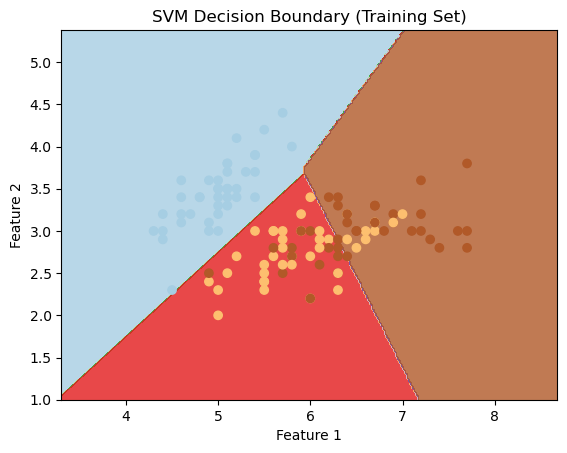

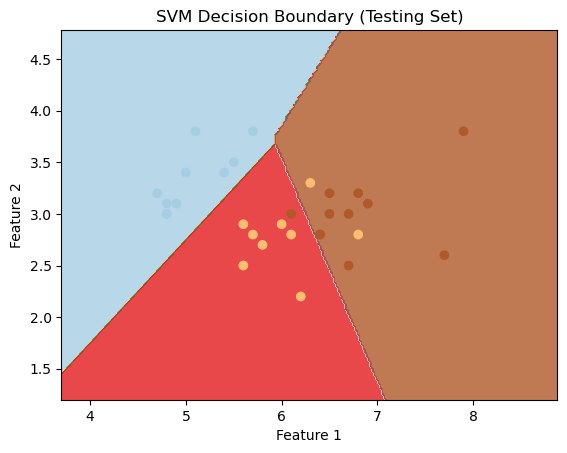

In [1]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take only the first two features for visualization
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = svm_classifier.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot decision boundaries
def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Plot decision boundaries
plot_decision_boundary(X_train, y_train, svm_classifier, 'SVM Decision Boundary (Training Set)')
plot_decision_boundary(X_test, y_test, svm_classifier, 'SVM Decision Boundary (Testing Set)')


In [2]:
class LinearSVM:
    def __init__(self, learning_rate=0.01, n_iterations=1000, C=1.0):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.C = C

    def fit(self, X, y):
        self.X = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
        self.y = 2 * y - 1  # Convert 0,1 labels to -1, 1
        self.weights = np.zeros(self.X.shape[1])

        for _ in range(self.n_iterations):
            margin = 1 - self.y * np.dot(self.X, self.weights)
            misclassified = margin > 0
            grad = -2 * np.dot(self.y[misclassified], self.X[misclassified]) + 2 * self.C * self.weights
            self.weights -= self.learning_rate * grad

    def predict(self, X):
        X_bias = np.c_[np.ones((X.shape[0], 1)), X]
        return np.sign(np.dot(X_bias, self.weights))

# Create and train the model
custom_svm = LinearSVM(C=1.0)
custom_svm.fit(X_train, y_train)

# Predict on the testing set
y_custom_pred = custom_svm.predict(X_test)

# Compute accuracy
custom_accuracy = accuracy_score(y_test, (y_custom_pred + 1) // 2)
print(f"Custom SVM Accuracy: {custom_accuracy * 100:.2f}%")


Custom SVM Accuracy: 40.00%
